In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import preprocessing

In [2]:
file = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\data_batch_1'
file2 = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\data_batch_2'
file3 = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\data_batch_3'
file4 = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\data_batch_4'
file5 = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\data_batch_5'
testfile = r'C:\Users\lauw02\Desktop\stats 418\cifar-10-python.tar\cifar-10-python\cifar-10-batches-py\test_batch'


In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

## actually this is a key:value dict where the value is like a huge array
# we only care about the "labels" and "data" so maybe extract that only
#test = unpickle(file)
#np.vstack(test[b'labels'])
#test[b'labels']

In [4]:
list_to_train = [file, file2,file3,file4, file5]
# instantiate dict
#train_data = np.empty((0,3072), dtype=object)
train_data = []
train_labels = []



# for i, file in enumerate(list_to_train[:-1]):
#     train_data.append(unpickle(i)[b'data'])
#     #train_data = np.concatenate([train_data, unpickle(file)])
    
for i in list_to_train:
     train_data.append(unpickle(i)[b'data'])
    
#np.concatenate( (unpickle(file)[b'data']), axis = 0)
    
    
for j in list_to_train:
    train_labels.append(unpickle(j)[b'labels'])



test_data = unpickle(testfile)[b'data'] #this is the right shape of all your training data (10k, 3072)
test_labels = unpickle(testfile)[b'labels']
#print(test_labels)

#now concat all your train data 1 through 5 (it is no longer a list of arrays, but just one big array)
train_data = np.concatenate([train_data[0], train_data[1], train_data[2], train_data[3], train_data[4]], axis =0)
train_data.shape #this is the right shape of all your training data (50k, 3072)
train_data.shape

(50000, 3072)

#scale the data so each feature/DATA part of train and test has min =  0 max = 1
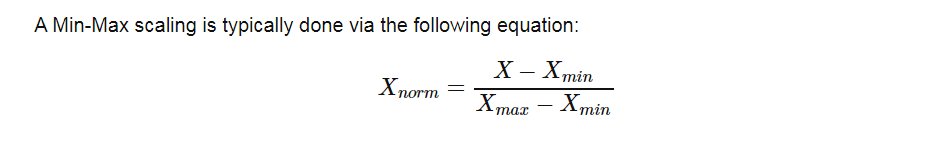

In [5]:
#first fit the data into a data frame with data col and labels col. 2 sep ones for train and test.
##scale each row of the train_data and test_data so its min max is 0 and 1

train_data[49999]

array([229, 236, 234, ..., 173, 162, 161], dtype=uint8)

In [6]:
import warnings
warnings.simplefilter('ignore')
#train_data_scaled = np.ones((50000,3072)) #this gives memory error
# train_data_scaled = np.ones(3072)
# train_data_scaled
# test =min_max_scaler.fit_transform(train_data[0].reshape(-1, 1)).T[0]
# test
# np.vstack((train_data_scaled,test))[0]

In [7]:
##scale each row of the train_data and test_data so its min max is 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
#min_max_scaler.fit(test_data[1].reshape(-1, 1))
#normalizepic1 = min_max_scaler.fit_transform(test_data[1].reshape(-1, 1))
#now it works for transforming one row, why is it giving memory error when trying to do it for all rows? -- DC all rows
#instead of (-1,1) param, it should be -1,1 because we want it to go from first element to the end of the row (3072 long)
train_data_scaled = []
#we want to do this normalize operation on all 10k rows/pictures
for i in range(len(train_data)):
    train_data_scaled.append( min_max_scaler.fit_transform(train_data[i].reshape(-1, 1)) )
    #train_data_scaled[i,:] =(min_max_scaler.fit_transform(train_data[i].reshape(-1, 1)) )
#len(train_data_scaled)
#np.stack(train_data_scaled, axis = 0)

In [12]:
# lengthloop = int(len(train_data_scaled)/1000)
# lengthloop

# # for i in range(lengthloop):
# #     train_data_scaled[1000*i: 1000*(i+1)]=np.concatenate(train_data_scaled[1000*i: 1000*(i+1)], axis =1).transpose().shape


# train1 = np.concatenate(train_data_scaled[0:1000], axis =1).transpose().shape
# #np.stack(train_data_scaled[0:9], axis = 0)
# #len(train_data_scaled[0:9])

In [13]:
# do the same to test_data
test_data_scaled = []
for i in range(len(test_data)):
    test_data_scaled.append(min_max_scaler.fit_transform(test_data[i].reshape(-1, 1)) )

In [11]:
#train_data_scaled[1].T #train_data_scaled[1] is length 3072, so that means each indexing of the scaled list is an array of full picture
#len(train_data_scaled[1])
type(train_data_scaled) #train_data_scaled is a list, it CONTAINS 50k numpy arrays, you want to convert alll these to np arrays
#train_data_scaled[0].T #this is not in the same SHAPE as "train_data", fix it
#train_data[0]
train_data_scaled = np.asarray(train_data_scaled)
#train_data_scaled[0]

##we want to convert list to ndarray, but ran out of memory, so now we want to make the numbers smaller/shorten them

MemoryError: 

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA

In [15]:
# train_data = []
test_data = []
n_components = 3
ipca = IncrementalPCA(n_components=n_components, batch_size=1)
X_ipca = ipca.fit_transform(train_data_scaled[range(1000),:]) #since this will give us memory error if num rows too large, just choose first 10k rows.

TypeError: list indices must be integers or slices, not tuple

In [54]:
X_ipca.shape #we have transformed whatever number of rows you have in X to now have n_component columns
#train_data[range(10000),:].shape

(1, 1)

In [ ]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=3, svd_solver='auto')
test = pca.fit_transform(train_data[range(10000),:])
test.shape

TypeError: list indices must be integers or slices, not tuple